<a href="https://colab.research.google.com/github/gdnsjf/educational-work/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import gdown
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score


# Загрузим данные
data = pd.read_csv("dataset.csv")

# Выберем нужные атрибуты
# SkinThickness	, BMI
X = data.iloc[:, [3, 5]].values
# Insulin
y = data.iloc[:, 4:5].values


# Разделим данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Применим LASSO регрессию
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
lasso_score = lasso_model.score(X_test, y_test)

# Применим Ridge регрессию
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
ridge_score = ridge_model.score(X_test, y_test)

# Применим Elastic Net регрессию
elasticnet_model = ElasticNet()
elasticnet_model.fit(X_train, y_train)
elasticnet_score = elasticnet_model.score(X_test, y_test)

# Обучаемся на линейной регрессии
lin_model= LinearRegression()
lin_model.fit(X,y)

# Применим Polynom регрессию со степенью полинома 2
poly_model= PolynomialFeatures(degree= 2)
x_poly= poly_model.fit_transform(X)
lin_reg_2 =LinearRegression()
lin_reg_2.fit(x_poly, y)
print(f'Pollinom 2 Regression score {lin_reg_2.score(x_poly, y)}')

# Применим Polynom регрессию со степенью полинома 5
poly_model= PolynomialFeatures(degree= 5)
x_poly= poly_model.fit_transform(X)
lin_reg_5 =LinearRegression()
lin_reg_5.fit(x_poly, y)
print(f'Pollinom 5 Regression score {lin_reg_5.score(x_poly, y)}')

# Применим Polynom регрессию со степенью полинома 10
poly_model= PolynomialFeatures(degree= 10)
x_poly= poly_model.fit_transform(X)
lin_reg_10 =LinearRegression()
lin_reg_10.fit(x_poly, y)
print(f'Pollinom 10 Regression score {lin_reg_10.score(x_poly, y)}')

print(f'LASSO Regression score: {lasso_score}')
print(f'Ridge Regression score: {ridge_score}')
print(f'Elastic Net Regression score: {elasticnet_score}')

Pollinom 2 Regression score 0.7144046404502367
Pollinom 5 Regression score 0.7187632692846129
Pollinom 10 Regression score 0.721501169532383
LASSO Regression score: 0.6864481136626243
Ridge Regression score: 0.6880770730599963
Elastic Net Regression score: 0.687288710272997


Линейная регрессия Score: 0.6091409048791132
Логистическая регрессия Score: 0.718052738336714
SVM Score: 0.6059736716989725


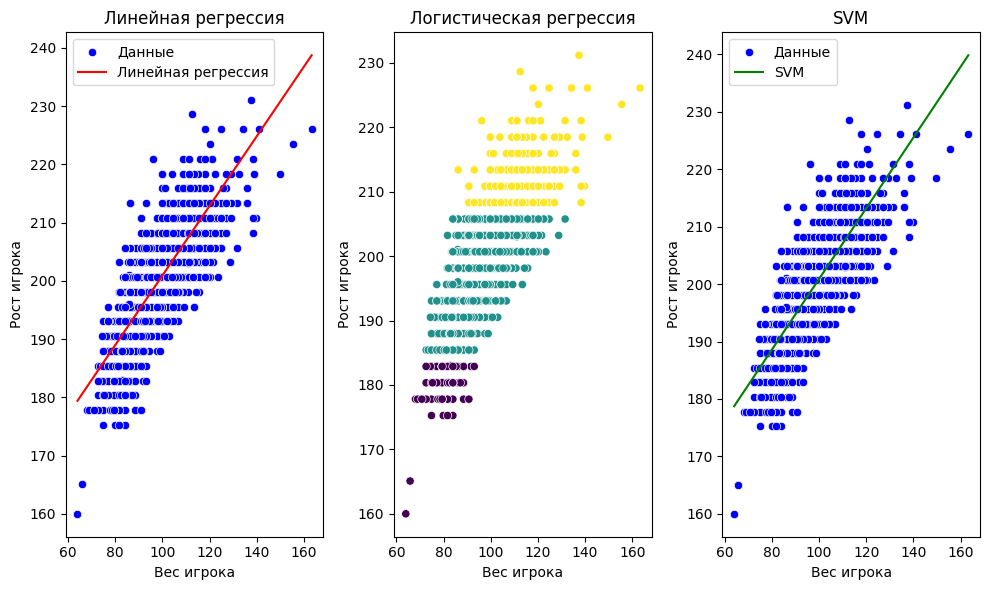

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score, accuracy_score
from sklearn.preprocessing import StandardScaler

# Загрузка датасета
df = pd.read_csv('dataset.csv')

# Очистка данных от дубликатов
data = df[['player_name','player_weight','player_height']].drop_duplicates(subset='player_name',keep='first')

# Выделение признаков и целевой переменной
X = data[['player_weight']]
y = data['player_height']

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Линейная регрессия
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
lin_reg_score = lin_reg.score(X_test_scaled, y_test)
print("Линейная регрессия Score:", lin_reg_score)

# Логистическая регрессия (для целевой переменной нужно создать категории)
y_train_cat = pd.cut(y_train, bins=3, labels=False)
y_test_cat = pd.cut(y_test, bins=3, labels=False)
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train_cat)
log_reg_score = log_reg.score(X_test_scaled, y_test_cat)
print("Логистическая регрессия Score:", log_reg_score)

# SVM
svm_reg = SVR(kernel='linear')
svm_reg.fit(X_train_scaled, y_train)
svm_reg_score = svm_reg.score(X_test_scaled, y_test)
print("SVM Score:", svm_reg_score)

# Визуализация
plt.figure(figsize=(10, 6))

# Визуализация линейной регрессии
plt.subplot(1, 3, 1)
sns.scatterplot(x=X_train['player_weight'], y=y_train, color='blue', label='Данные')
sns.lineplot(x=X_train['player_weight'], y=lin_reg.predict(X_train_scaled), color='red', label='Линейная регрессия')
plt.title('Линейная регрессия')
plt.xlabel('Вес игрока')
plt.ylabel('Рост игрока')

# Визуализация логистической регрессии
plt.subplot(1, 3, 2)
sns.scatterplot(x=X_train['player_weight'], y=y_train, hue=y_train_cat, palette='viridis', legend=False)
plt.title('Логистическая регрессия')
plt.xlabel('Вес игрока')
plt.ylabel('Рост игрока')

# Визуализация SVM
plt.subplot(1, 3, 3)
sns.scatterplot(x=X_train['player_weight'], y=y_train, color='blue', label='Данные')
sns.lineplot(x=X_train['player_weight'], y=svm_reg.predict(X_train_scaled), color='green', label='SVM')
plt.title('SVM')
plt.xlabel('Вес игрока')
plt.ylabel('Рост игрока')

plt.tight_layout()
plt.show()